<a href="https://colab.research.google.com/github/praveenpareek11/digital-marketing/blob/master/miq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions

/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_Site_BrowingBehavior

In [0]:
#Import necessary libraries.
import math
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%matplotlib inline

In [0]:
#load the dataset.
final_df = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_FInalConversions', delim_whitespace=True, names=('Date', 'Time', 'UserID', 'ProductID', 'Amount'))
browsing_df = pd.read_table('/content/drive/My Drive/Colab Notebooks/data/MiQ/Problem2_Site_BrowingBehavior', delim_whitespace=True, names=('Date', 'Time', 'UserID', 'Category'))

## Exploratory Data Analysis

In [3]:
#Check both dataframes one by one.
final_df.head()

,Date,Time,UserID,ProductID,Amount
0,2017-07-26,00:00:10.465,0,A293532,52.14
1,2017-07-26,00:00:12.301,0,H209597,31.50
2,2017-07-26,00:00:12.388,0,H211370,30.48
3,2017-07-26,00:00:14.389,0,A282331,51.00
4,2017-07-26,00:00:16.837,0,H211410,16.74


In [4]:
#Check the number of entries, names of columns, their data-type, and if they have null values.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 5 columns):
Date         79795 non-null object
Time         79795 non-null object
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.0+ MB


##This dataframe is about the users who actually purchased some items after browsing the website and visited certain parts of website.

The attributes of the dataset are easily identifiable from their names. We know right away what each of these fields might mean. For the sake of completeness, we include the description of each column here:

- **Date:** Date of purchase (data-type: object, no-null value)
- **Time:** Time of purchase (data-type: object, no-null value)
- **UserID:** User ID (data-type: int, no-null value)
- **ProductID:** Product ID (data-type: object, no-null value)
- **Amount:** Amount of that transaction (data-type: float, no-null value)

In [5]:
#Check the number of entries, names of columns, their data-type, and if they have null values.
browsing_df.head()

,Date,Time,UserID,Category
0,2017-07-26,00:01:40.965,0,product
1,2017-07-26,00:03:18.448,0,product
2,2017-07-26,00:36:59.028,0,default
3,2017-07-26,00:41:17.273,0,product-listing-category
4,2017-07-26,00:45:39.197,0,content


In [6]:
#Check the number of entries, names of columns, their data-type, and if they have null values.
browsing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 4 columns):
Date        object
Time        object
UserID      int64
Category    object
dtypes: int64(1), object(3)
memory usage: 168.9+ MB


##This dataframe contains the user behaviour, the browsing sections he visited before he purchased some item(s) or chose to not buying anything.

The description of each column here:

- **Date:** Date of purchase (data-type: object, no-null value)
- **Time:** Time of purchase (data-type: object, no-null value)
- **UserID:** User ID (data-type: int, no-null value)
- **Category:** Product ID (data-type: object, no-null value)

In [7]:
#Check the data, how many day's transaction it contains.
final_df['Date'].unique()

array(['2017-07-26'], dtype=object)

In [8]:
browsing_df['Date'].unique()

array(['2017-07-26'], dtype=object)

# Surprisingly, the whole data is for the same day.

So, in next step, we will convert the index to date-time format.

**It'll be easy to track the users in reference to time. In short it'll make the analysis easy.**

In [9]:
#Make a column "DateTime", so we can set it as the index for data.

final_df['DateTime'] = final_df['Date'] + ' ' + final_df['Time']
browsing_df['DateTime'] = browsing_df['Date'] + ' ' + browsing_df['Time']
final_df.head()

,Date,Time,UserID,ProductID,Amount,DateTime
0,2017-07-26,00:00:10.465,0,A293532,52.14,2017-07-26 00:00:10.465
1,2017-07-26,00:00:12.301,0,H209597,31.50,2017-07-26 00:00:12.301
2,2017-07-26,00:00:12.388,0,H211370,30.48,2017-07-26 00:00:12.388
3,2017-07-26,00:00:14.389,0,A282331,51.00,2017-07-26 00:00:14.389
4,2017-07-26,00:00:16.837,0,H211410,16.74,2017-07-26 00:00:16.837


In [0]:
#Now, there's no need for the date and time column as we combined them in seperate column.

final_df = final_df.drop(columns=['Date', 'Time'])
browsing_df = browsing_df.drop(columns=['Date', 'Time'])

In [11]:
#Check the data-type of the new column.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


In [0]:
# To make the analysis easy, as a final step, convert the datetime column to pandas "datetime" data-type.
# It will make the machine understand that the data in datetime column is really date-time type.

final_df['DateTime'] = pd.to_datetime(final_df['DateTime'])
browsing_df['DateTime'] = pd.to_datetime(browsing_df['DateTime'])

In [13]:
# Look at the data-type of DateTime column.
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79795 entries, 0 to 79794
Data columns (total 4 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
DateTime     79795 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.4+ MB


In [0]:
# Now it's time to set this column as index.

final_df = final_df.set_index('DateTime')
browsing_df = browsing_df.set_index('DateTime')

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79795 entries, 2017-07-26 00:00:10.465000 to 2017-07-26 23:21:05.221000
Data columns (total 3 columns):
UserID       79795 non-null int64
ProductID    79795 non-null object
Amount       79795 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ MB


We saw previously that the UserID = 0 for some of the transactions.

In [16]:
# Check the number of rows which have UserID = 0.

print(final_df[final_df['UserID'] == 0].shape[0])
print(browsing_df[browsing_df['UserID'] == 0].shape[0])

20197
1407879


That's a large percentage of data.

###**So to make analysis more clear, we have to analyse both the types (UserID = Known  & UserId = Unknown) seperately**

Make seperate dataframes for both.

In [0]:
#Make different dataframe of users whose id's are known

final_df_1 = final_df[~(final_df['UserID'] == 0)]
browsing_df_1 = browsing_df[~(browsing_df['UserID'] == 0)]

In [0]:
#Make different dataframe of users whose id's are unknown i.e. USER ID = 0

final_df_0 = final_df[final_df['UserID'] == 0]
browsing_df_0 = browsing_df[(browsing_df['UserID'] == 0)]

In [19]:
final_df_1.head()

,UserID,ProductID,Amount
DateTime,,,
2017-07-26 00:00:15.267,5942997097932061,K43931,157.95
2017-07-26 00:26:44.266,23951842225160889,H211370,33.48
2017-07-26 00:26:44.361,23951842225160889,H211370,27.48
2017-07-26 00:55:37.774,30833658052409950,H211394,44.68
2017-07-26 00:10:46.954,33873861847792934,H211800,53.24


In [20]:
final_df_0.head()

,UserID,ProductID,Amount
DateTime,,,
2017-07-26 00:00:10.465,0,A293532,52.14
2017-07-26 00:00:12.301,0,H209597,31.50
2017-07-26 00:00:12.388,0,H211370,30.48
2017-07-26 00:00:14.389,0,A282331,51.00
2017-07-26 00:00:16.837,0,H211410,16.74


# First we analyse the data for which UserID is known.

#### **Let's find some pattern in their purchasing behaviour.**

Now it's time to get insights about the data:

- The number of unique ProductID.
- The number of unique UserID.

In [21]:
# Number of Unique users.

final_df_1.UserID.value_counts()

6999042003656970156    31
559346213618742389     22
9050159186422090402    20
1536590739380574003    20
1463071565557282392    18
                       ..
8881338685710960879     1
6312288472847639971     1
5809811532399202736     1
5339657982462520970     1
505443533027714013      1
Name: UserID, Length: 41008, dtype: int64

In [22]:
browsing_df_1.UserID.value_counts()

3077341700699443780    3106
7190685980615725949     821
1215902060999829238     723
7188604889406730572     550
8196139059029454168     499
                       ... 
5738221067634510604       1
6076634541638581774       1
1061247019632108745       1
7718292851259081351       1
5864534280473568899       1
Name: UserID, Length: 516931, dtype: int64

*****************
**************
Above analysis tells us that not all the users who browsed, purchased items.
- Some of them purchased.
- Others didn't

Let's see the hourly trend of purchasing and browsing in 24 hours:

- Starting from : 0
- To : 23

**************
***********************

In [0]:
# Get the sale amount each hour, and then sort them in descending hour (Top sale hour first.).

hourly_amount = (final_df_1['Amount'].groupby(final_df_1['Amount'].index.hour).sum()).sort_values(ascending=False)

In [24]:
hourly_amount.head()

DateTime
1     339811.83
0     314099.32
2     294951.78
3     253236.50
22    238963.93
Name: Amount, dtype: float64

# Now, let's plot the hourly_amount data and see the pattern.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

Text(0.5, 0, 'Hours from 0 to 23')

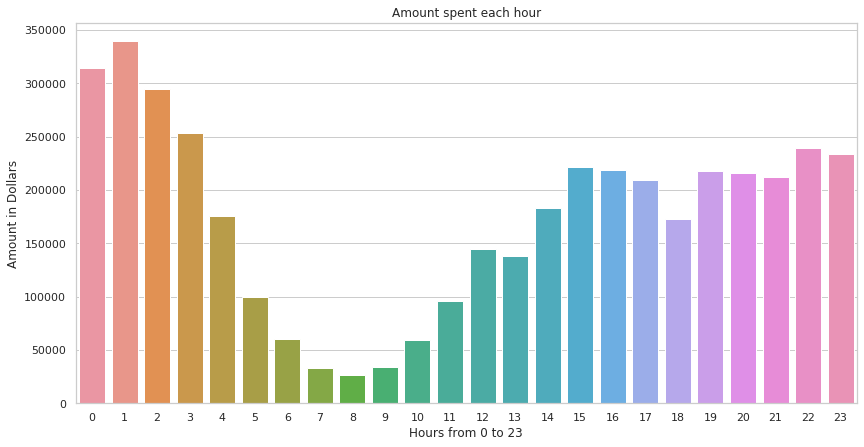

In [26]:
dims = (14,7)
fig, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_amount.index, y=hourly_amount.values, ax=ax)
ax.set_title('Amount spent each hour')
ax.set_ylabel('Amount in Dollars')
ax.set_xlabel('Hours from 0 to 23')

# Now let's see the Number of customer each hour.
# Customer Traffic:

In [0]:
hourly_count = (final_df_1['Amount'].groupby(final_df_1['Amount'].index.hour).count()).sort_values(ascending=False)

Text(0.5, 0, 'Hours from 0 to 23')

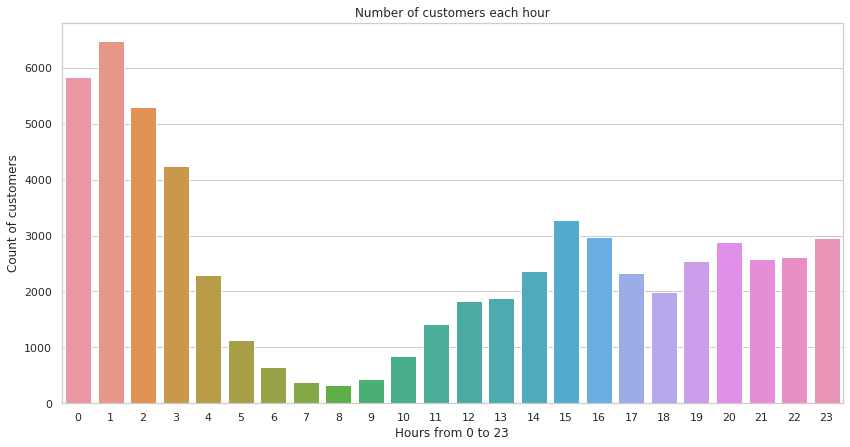

In [28]:
dims = (14,7)
fig1, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_count.index, y=hourly_count.values, ax=ax)
ax.set_title('Number of customers each hour')
ax.set_ylabel('Count of customers')
ax.set_xlabel('Hours from 0 to 23')

In [0]:
hourly_amount = hourly_amount.sort_index()

In [30]:
hourly_amount.head()

DateTime
0    314099.32
1    339811.83
2    294951.78
3    253236.50
4    176053.83
Name: Amount, dtype: float64

In [31]:
hourly_count = hourly_count.sort_index()
hourly_count.head()

DateTime
0    5838
1    6482
2    5293
3    4248
4    2302
Name: Amount, dtype: int64

In [0]:
hourly_amount_per_user = hourly_amount.div(hourly_count)

In [33]:
hourly_amount_per_user.head()

DateTime
0    53.802556
1    52.423917
2    55.724878
3    59.613112
4    76.478640
Name: Amount, dtype: float64

Text(0.5, 0, 'Hours from 0 to 23')

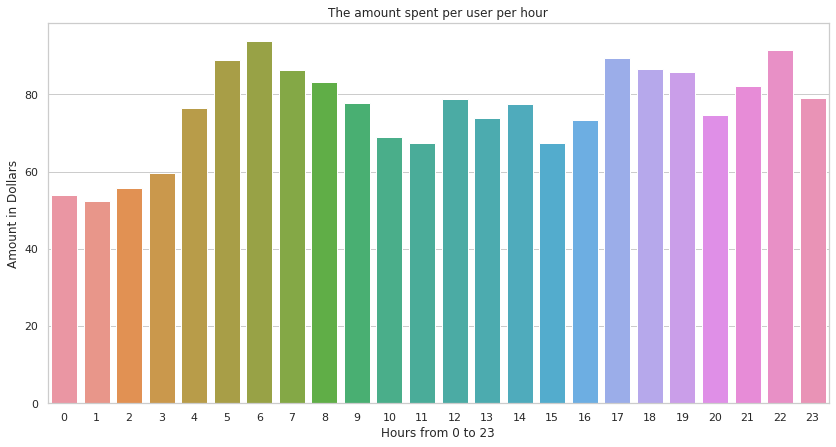

In [34]:
dims = (14,7)
fig1, ax = plt.subplots(figsize=dims)
ax = sns.barplot(x=hourly_amount_per_user.index, y=hourly_amount_per_user.round(2).values, ax=ax)
ax.set_title('The amount spent per user per hour')
ax.set_ylabel('Amount in Dollars')
ax.set_xlabel('Hours from 0 to 23')

# Conclusion of the above 3 graphs:

- ### **We see the maximum sale is during 22 to 3 hours (11 PM to 3 AM.)**
- ### **Comparately less sale during 4:00 AM to 1:00 PM.**
- ### **The customers purchasing during 10:00 PM to 12:00 AM buy more costly items than the users purchasing from 12:00 AM to 3:00 AM**

### We also know that many of them are repeating customers. So let's find the number of repeating customers.

In [35]:
value_count = final_df_1.UserID.value_counts()
len(value_count[value_count > 1])

11031

### So 11031 customers are coming again to shop in these 24 hours. 

- So, let's analyse the behaviour more deeply.
- Before it we also check, how many customers contribute to top 10% of sale.

In [36]:
# Gives the cumulative sum
(final_df_1.UserID.value_counts()/sum(final_df_1.UserID.value_counts())*100).head(n=1000).cumsum()

6999042003656970156     0.052015
559346213618742389      0.088929
9050159186422090402     0.122487
1536590739380574003     0.156046
1463071565557282392     0.186248
                         ...    
6766121171263421615    10.094298
3786525428575259375    10.101010
2766873732812530826    10.107722
576834434684920297     10.114433
3184147857852766247    10.121145
Name: UserID, Length: 1000, dtype: float64

*************
*************
- **This tells us that we have 41,008 unique customers but almost 10% of total sales are contributed by only 1000 customers (based on the cumulative percentage aggregation in the preceding output).** 
- **The next thing we want to determine is how many unique items the firm is selling.**
**************
*****************

In [38]:
# Number of unique products.
final_df_1.ProductID.unique().shape[0]

11000

## Building Recency Feature

In [43]:
final_df_1.index.max()

Timestamp('2017-07-26 23:59:58.686000')

In [44]:
final_df_1.index.min()

Timestamp('2017-07-26 00:00:01.951000')

In [0]:
refrence_time = final_df_1.index.max()
refrence_time = refrence_time + timedelta(minutes = 1)

In [0]:
final_df_1['time_since_last_purchase'] = refrence_time - final_df_1.index
final_df_1['time_since_last_purchase_num'] = final_df_1['time_since_last_purchase'].astype('timedelta64[m]')

### Time period of transactions

In [47]:
customer_history_df = final_df_1.groupby("UserID").min().reset_index()[['UserID', 'time_since_last_purchase_num']]
customer_history_df.rename(columns={'time_since_last_purchase_num':'recency'}, inplace=True)
customer_history_df.recency.describe()

count    41008.000000
mean       719.282433
std        484.977410
min          1.000000
25%        274.000000
50%        598.000000
75%       1256.000000
max       1440.000000
Name: recency, dtype: float64

In [48]:
customer_history_df.head()

,UserID,recency
0,2941287703,199.0
1,71023925710020,718.0
2,394529638495081,791.0
3,430191686443660,428.0
4,887103105578626,1425.0


In [49]:
customer_history_df.recency.describe()

count    41008.000000
mean       719.282433
std        484.977410
min          1.000000
25%        274.000000
50%        598.000000
75%       1256.000000
max       1440.000000
Name: recency, dtype: float64

In [50]:
customer_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41008 entries, 0 to 41007
Data columns (total 2 columns):
UserID     41008 non-null int64
recency    41008 non-null float64
dtypes: float64(1), int64(1)
memory usage: 640.9 KB


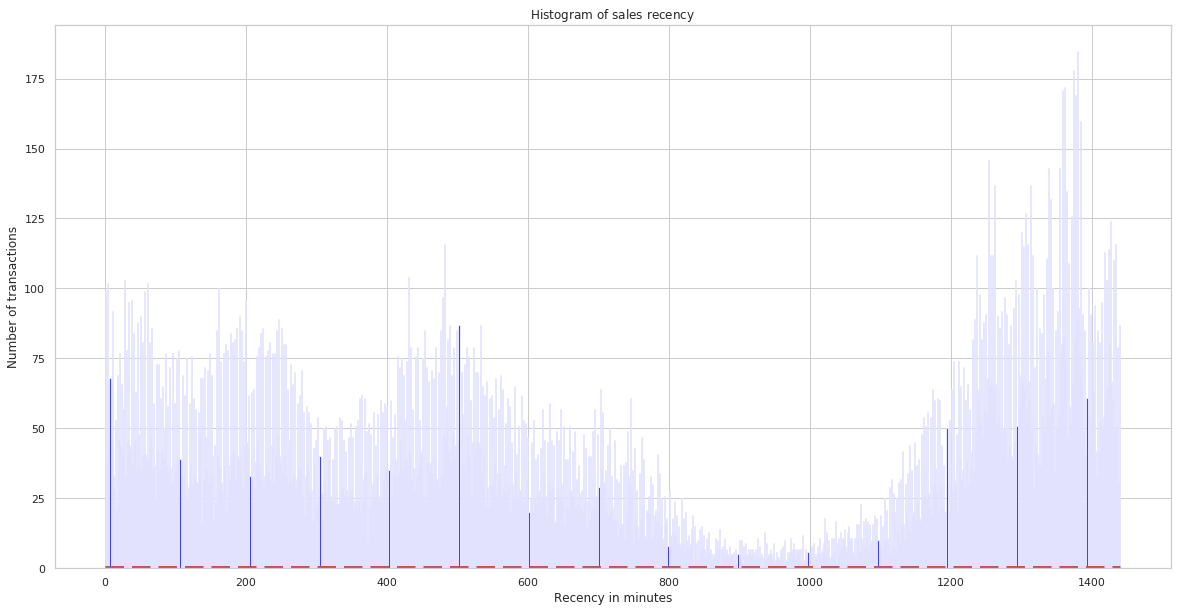

In [52]:
from scipy.stats import norm

plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots(1, 1)
x = customer_history_df.recency
mu = np.mean(customer_history_df.recency)
sigma = math.sqrt(np.var(customer_history_df.recency))
n, bins, patches = plt.hist(x, 1000, facecolor='blue', alpha=0.75)
# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', lw=5)
plt.xlabel('Recency in minutes')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)

## Build Frequency & Monetary value Features

In [0]:
customer_monetary_val = final_df_1[['UserID', 'Amount']].groupby("UserID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val, how='outer')
customer_history_df.Amount = customer_history_df.Amount+0.001
customer_freq = final_df_1[['UserID', 'Amount']].groupby("UserID").count().reset_index()
customer_freq.rename(columns={'Amount':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq, how='outer')

In [54]:
customer_history_df.head()

,UserID,recency,Amount,frequency
0,2941287703,199.0,75.341,1
1,71023925710020,718.0,89.961,1
2,394529638495081,791.0,94.341,1
3,430191686443660,428.0,84.701,2
4,887103105578626,1425.0,52.141,1


In [55]:
customer_history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41008 entries, 0 to 41007
Data columns (total 4 columns):
UserID       41008 non-null int64
recency      41008 non-null float64
Amount       41008 non-null float64
frequency    41008 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.6 MB


In [56]:
customer_history_df.isnull().sum(axis = 0)

UserID       0
recency      0
Amount       0
frequency    0
dtype: int64

In [0]:
from sklearn import preprocessing
from math import log

customer_history_df['recency_log'] = np.log(customer_history_df['recency'])
customer_history_df['frequency_log'] = np.log(customer_history_df['frequency'])
customer_history_df['amount_log'] = np.log(customer_history_df['Amount'])
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector].to_numpy()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)

In [58]:
customer_history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41008 entries, 0 to 41007
Data columns (total 7 columns):
UserID           41008 non-null int64
recency          41008 non-null float64
Amount           41008 non-null float64
frequency        41008 non-null int64
recency_log      41008 non-null float64
frequency_log    41008 non-null float64
amount_log       41008 non-null float64
dtypes: float64(5), int64(2)
memory usage: 2.5 MB


In [59]:
customer_history_df['recency']

0         199.0
1         718.0
2         791.0
3         428.0
4        1425.0
          ...  
41003     451.0
41004     408.0
41005    1278.0
41006     244.0
41007    1353.0
Name: recency, Length: 41008, dtype: float64

In [60]:
customer_history_df.head()

,UserID,recency,Amount,frequency,recency_log,frequency_log,amount_log
0,2941287703,199.0,75.341,1,5.293305,0.000000,4.322024
1,71023925710020,718.0,89.961,1,6.576470,0.000000,4.499376
2,394529638495081,791.0,94.341,1,6.673298,0.000000,4.546916
3,430191686443660,428.0,84.701,2,6.059123,0.693147,4.439127
4,887103105578626,1425.0,52.141,1,7.261927,0.000000,3.953952


In [61]:
type(X_scaled)

numpy.ndarray

In [62]:
X_scaled.shape

(41008, 3)

In [63]:
X_scaled

array([[ 0.10636061, -0.77485233, -0.5529925 ],
       [ 0.33632963,  0.35639344, -0.5529925 ],
       [ 0.39797347,  0.44175794, -0.5529925 ],
       ...,
       [-0.09708288,  0.86471166, -0.5529925 ],
       [ 0.95496217, -0.59512513, -0.5529925 ],
       [-0.32546324,  0.91498788, -0.5529925 ]])

## Visualizing Recency vs Monetary Value (scaled)

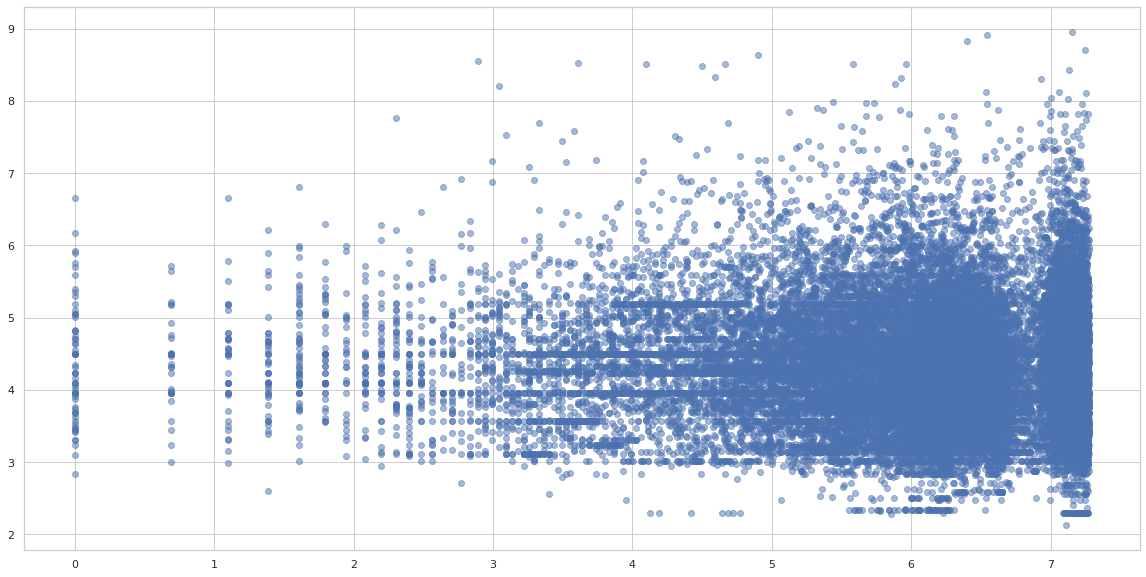

In [64]:
plt.scatter(customer_history_df.recency_log, customer_history_df.amount_log, alpha=0.5)

## Visualizing Monetary Value distribution (scaled)

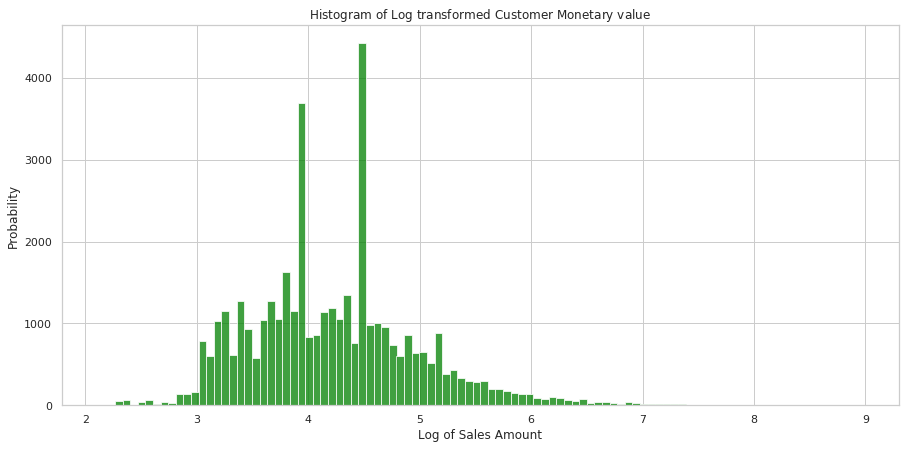

In [69]:
plt.rcParams["figure.figsize"] = (15,7)
fig, ax = plt.subplots(1, 1)

x = customer_history_df.amount_log
n, bins, patches = plt.hist(x, 100, facecolor='green', alpha=0.75)

plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Log\ transformed\ Customer\ Monetary\ value}\ $')
plt.grid(True)
#plt.show()

*********************
### The above plot looks close to **Normal DIstribution**.
***************

In [70]:
customer_history_df.head()

,UserID,recency,Amount,frequency,recency_log,frequency_log,amount_log
0,2941287703,199.0,75.341,1,5.293305,0.000000,4.322024
1,71023925710020,718.0,89.961,1,6.576470,0.000000,4.499376
2,394529638495081,791.0,94.341,1,6.673298,0.000000,4.546916
3,430191686443660,428.0,84.701,2,6.059123,0.693147,4.439127
4,887103105578626,1425.0,52.141,1,7.261927,0.000000,3.953952


Text(0.5, 0, 'Monetary')

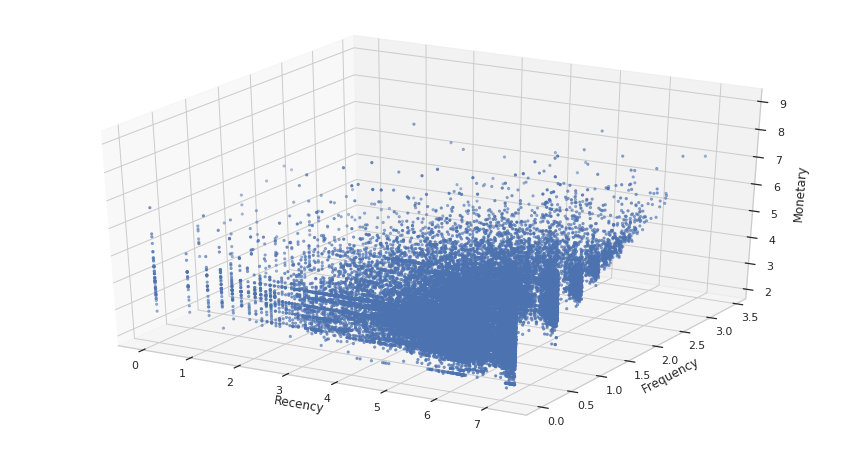

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

#plt.show()

## Analyze Customer Segments with Clustering

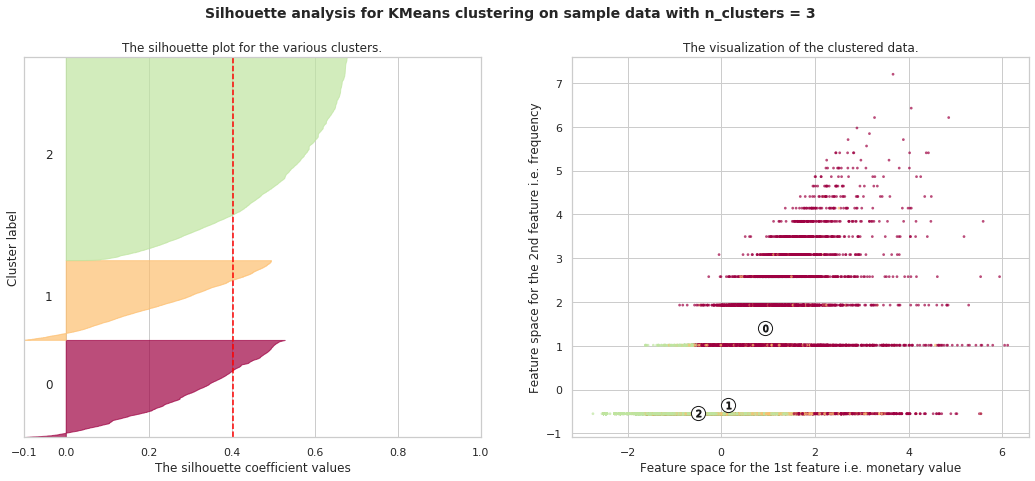

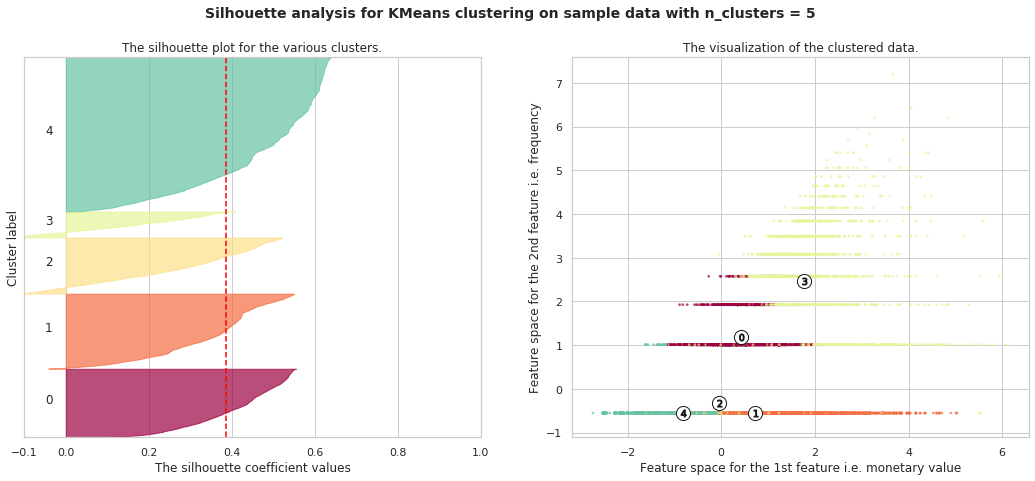

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    #plt.show()

In [73]:
for i in range(3,6,2):
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 3 number of clusters
   amount_log  recency_log  frequency_log
0  143.419899   672.407601       2.388289
1   77.106345    91.638188       1.092454
2   47.041466   779.789277       1.006728
Silhouette score for cluster 3 is 0.40297048226971866

for 5 number of clusters
   amount_log  recency_log  frequency_log
0   96.353018   727.604310       2.155507
1  121.751487   552.531090       1.000000
2   66.958861    62.240135       1.105225
3  271.884295   472.584298       3.812529
4   36.762126   778.311318       1.000873
Silhouette score for cluster 5 is 0.38605006752177995



## Assign Cluster Labels

In [0]:
labels = cluster_centers[5]['labels']   
customer_history_df['num_cluster5_labels'] = labels
labels = cluster_centers[3]['labels']
customer_history_df['num_cluster3_labels'] = labels

In [75]:
customer_history_df.head()

,UserID,recency,Amount,frequency,recency_log,frequency_log,amount_log,num_cluster5_labels,num_cluster3_labels
0,2941287703,199.0,75.341,1,5.293305,0.000000,4.322024,2,1
1,71023925710020,718.0,89.961,1,6.576470,0.000000,4.499376,1,2
2,394529638495081,791.0,94.341,1,6.673298,0.000000,4.546916,1,2
3,430191686443660,428.0,84.701,2,6.059123,0.693147,4.439127,0,0
4,887103105578626,1425.0,52.141,1,7.261927,0.000000,3.953952,4,2


In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Visualize Segments

In [0]:
configure_plotly_browser_state()

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 100
field_to_plot = 'recency'

y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    autosize=False,
    width=1200,
    height=500,
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)
# py.offline.iplot(fig)

# The difference recency plot is as shown:

![dsr1](https://user-images.githubusercontent.com/36000962/75791195-3a1fea80-5d92-11ea-8134-a8c338d427c1.png)

![dsr2](https://user-images.githubusercontent.com/36000962/75791213-3ee49e80-5d92-11ea-9ca6-70e087e07325.png)

![dsr3](https://user-images.githubusercontent.com/36000962/75791220-4310bc00-5d92-11ea-9738-a1d3fe6306d2.png)

![dsr4](https://user-images.githubusercontent.com/36000962/75791226-44da7f80-5d92-11ea-976e-3bb6a69ecac0.png)

In [0]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        dtick=100,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)


# Difference in sales amount from cluster to cluster.

![dsa1](https://user-images.githubusercontent.com/36000962/75791775-13ae7f00-5d93-11ea-936b-d50d5fb5fc0d.png)
![dsa2](https://user-images.githubusercontent.com/36000962/75791782-17420600-5d93-11ea-9099-0eaacec72ad5.png)
![dsa3](https://user-images.githubusercontent.com/36000962/75791793-19a46000-5d93-11ea-8dae-52e0f0c74096.png)
![dsa4](https://user-images.githubusercontent.com/36000962/75791797-1b6e2380-5d93-11ea-80de-4747cdd35a82.png)

In [0]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 100
field_to_plot = 'frequency'
y0 = customer_history_df[customer_history_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = customer_history_df[customer_history_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = customer_history_df[customer_history_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        dtick=1,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)

# Difference in sales frequency from cluster to cluster.


![dsf1](https://user-images.githubusercontent.com/36000962/75792005-62f4af80-5d93-11ea-9a51-bcb17f7bc7c4.png)
![dsf2](https://user-images.githubusercontent.com/36000962/75792214-a64f1e00-5d93-11ea-8cac-540cf2c9f54c.png)
![dsf3](https://user-images.githubusercontent.com/36000962/75792224-a8b17800-5d93-11ea-8c30-7fbeea9e3b42.png)
![dsf4](https://user-images.githubusercontent.com/36000962/75792233-aa7b3b80-5d93-11ea-81c6-d1f55312b27e.png)



In [0]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 100
field_to_plot = 'recency'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)

# Difference in sales recency from cluster to cluster.

![dsr11](https://user-images.githubusercontent.com/36000962/75792624-3f7e3480-5d94-11ea-9ea5-7687e03e07ba.png)
![dsr12](https://user-images.githubusercontent.com/36000962/75792635-43aa5200-5d94-11ea-8d50-3b45194c19db.png)
![dsr13](https://user-images.githubusercontent.com/36000962/75792642-45741580-5d94-11ea-990a-599e05e5d0f9.png)
![dsr14](https://user-images.githubusercontent.com/36000962/75792646-47d66f80-5d94-11ea-87f5-f437320acc31.png)


In [0]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 90
field_to_plot = 'Amount'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(        
        dtick=20,
    )
)

go.Figure(data=traces, layout=layout)

# Difference in sales amount from cluster to cluster.

![dsa11](https://user-images.githubusercontent.com/36000962/75793022-c501e480-5d94-11ea-8b99-919a1e9163d9.png)
![dsa12](https://user-images.githubusercontent.com/36000962/75793054-d0551000-5d94-11ea-80ec-2587c581c8f4.png)
![dsa13](https://user-images.githubusercontent.com/36000962/75793058-d21ed380-5d94-11ea-8749-1939876c8869.png)
![dsa14](https://user-images.githubusercontent.com/36000962/75793063-d4812d80-5d94-11ea-83f0-8f52ba931f8b.png)


In [0]:
configure_plotly_browser_state()


x_data = ['Cluster 1','Cluster 2','Cluster 3']
cutoff_quantile = 98
field_to_plot = 'frequency'
y0 = customer_history_df[customer_history_df['num_cluster3_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = customer_history_df[customer_history_df['num_cluster3_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = customer_history_df[customer_history_df['num_cluster3_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]

y_data = [y0,y1,y2]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=False,
        zeroline=True,
        dtick=1,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

go.Figure(data=traces, layout=layout)

# Difference in sales frequency from cluster to cluster.

![dsf11](https://user-images.githubusercontent.com/36000962/75793290-2924a880-5d95-11ea-8577-5272e1ce9c3a.png)
![dsf12](https://user-images.githubusercontent.com/36000962/75793296-2c1f9900-5d95-11ea-8e63-4f779df8bc88.png)
